In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [67]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

print(test.shape,train.shape)

(300, 2) (700, 2)


In [103]:
type(x_train)

pandas.core.frame.DataFrame

In [105]:
test = test.dropna()
train = train.dropna()
print(test.shape,train.shape)

(300, 2) (699, 2)


In [106]:
x_train = pd.DataFrame(train['x'])
y_train = pd.DataFrame(train['y'])
x_test = pd.DataFrame(test['x'])
y_test = pd.DataFrame(test['y'])



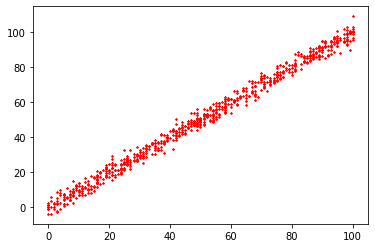

In [33]:
plt.scatter(train.x,train.y, color = 'red', marker = '*', s = 3)

In [34]:
# It looks like there is a positive correlation between X and Y

In [35]:
# Let us try to identify how the change of X , changes Y. We need to first find the line of best fit . For this , 
# We can using the stats library to idenify the slope and Y-intercept



In [108]:
slope,intercept,rval,pval,stderr = stats.linregress(train.x,train.y)

In [109]:
print(f"slope: {slope},intercept: {intercept},correlation: {rval},Pvalue: {pval}, Standard Error: {stderr}")
print("R-squared: %f" % rval**2)

slope: 1.000656381856304,intercept: -0.10726546430097272,correlation: 0.9953399077212526,Pvalue: 0.0, Standard Error: 0.0036720016347328716
R-squared: 0.990702


In [38]:
# Create an array of line of best fit
regression_line = []
for i in train.x:
    regression_line.append((slope*i)+ intercept)

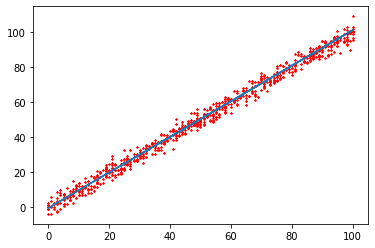

In [39]:
# Add the regression line or line of best fit to the graph
plt.scatter(train.x,train.y, color = 'red', marker = '*', s = 3)
plt.plot(train.x, regression_line)

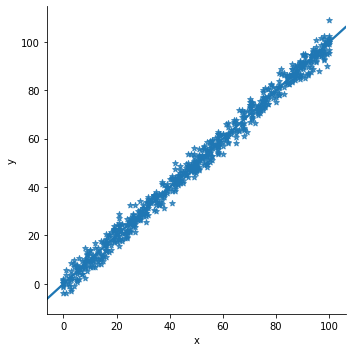

In [58]:
sns.lmplot('x','y', data = train,markers = '*', height = 5, palette = 'red')

In [118]:
# For example x = 77
predicted_val = (slope*77 + intercept)
print(predicted_val)

76.94327593863443


In [107]:
# Now to set up the linear regression model
# Create linear regression object

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
print (linear_regression.coef_, linear_regression.intercept_)


[1.00065638] -0.10726546430097272


In [110]:
# Evaluate on test set
final_pred = linear_regression.predict(x_test)

In [113]:
pred = pd.DataFrame(final_pred)

In [116]:
# merge the test predicted values and check
final_df = pd.concat([test, pred], axis = 1)

In [117]:
final_df

,x,y,0
0,77,79.775152,76.943276
1,21,23.177279,20.906519
2,22,25.609262,21.907175
3,20,17.857388,19.905862
4,36,41.849864,35.916364
5,15,9.805235,14.902580
6,62,58.874659,61.933430
7,95,97.617937,94.955091
8,20,18.395127,19.905862
9,5,8.746748,4.896016
